In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',200)

gaming = pd.read_csv('GamingStudy_data.csv', encoding = 'ISO-8859-1')

# Overview

The hope of this project is to find any correlations within this data set and produce a model which can accurately provide resources to gamers who experience high levels of social anxiety, low levels of life satisfaction, and narcissism levels.

This data was obtained through a survey that asked participants questions from validated scales and ultimately scores these individuals respectively to each scale.

# Exploratory Data Analysis

##### Inital questions:
* Does the type of game correlate with anxiousness?
* Does the rank of the player correlate with narcissm?
* Does amount of time playing correlate with how one feels about the "fullness/completeness of their life?"
* Do people who get paid to play games more satisfied with their life than people who do not get paid to play games?


In [3]:
gaming.head(5)

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,highestleague,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,3,5,5,5,5,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,3,5,2,5,1,Other,PC,8.0,I play for fun,having fun,NaN,NaN,2.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,2,6,5,2,2,Other,PC,0.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,1.0,2.0,3.0,4.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,Female,32,Employed,Bachelor (or equivalent),Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,2,5,5,3,2,Other,PC,20.0,I play for fun,improving,NaN,NaN,5.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,Male,28,Employed,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,2,2,4,5,1,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,NaN,NaN,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,Male,19,Employed,High school diploma (or equivalent),USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [4]:
print(gaming.columns)

Index(['S. No.', 'Timestamp', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6',
       'GAD7', 'GADE', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game',
       'Platform', 'Hours', 'earnings', 'whyplay', 'League', 'highestleague',
       'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6',
       'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13',
       'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Narcissism', 'Gender', 'Age',
       'Work', 'Degree', 'Birthplace', 'Residence', 'Reference', 'Playstyle',
       'accept', 'GAD_T', 'SWL_T', 'SPIN_T', 'Residence_ISO3',
       'Birthplace_ISO3'],
      dtype='object')


#### There's a lot of columns that have abstract names. Let's figure out what they are based on documentation:

The SPIN columns relate to the "Social Phobia Inventory". SPIN consists of 17 questions that are answered through an ordinal scale to detect social anxiety disorder. SPIN then summarizes one's total score by aggregating the scores of each question and classifying them with a range of symptom severity based on their score.

Working with the "SPIN_T" (SPIN total) column seems like a sufficient summary of the individual SPIN columns. I'll use this for analysis and drop the individual columns.

GAD stands for "Generalized Anxiety Disorder". It is a 7 item question that outputs an aggregated score similar to SPIN and categorizes an indivdual based on their score. Similar to SPIN, I will drop the individual columns and only work with "GAD_T".

SWL stands for "Life Satisfaction". It is identical to SPIN and GAD and I will only use the "SWL_T" column.



In [5]:
#Dropping the columns
gaming = gaming.drop(['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6',
'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13',
'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'highestleague', 'S. No.', 'Timestamp', 'accept', 'Reference', 'GADE', 'Gender'], axis = 1)

In [6]:
# Filtering so that only the top three options are included. It would be too difficult to clean and parse for the free option response

print("Unique values under earnings", len(gaming['earnings'].value_counts()))

gaming = gaming[(gaming['earnings'] == "I play for fun") |(gaming['earnings'] == "I play mostly for fun but earn a little on the side (tournament winnings, streaming, etc)") |
                (gaming['earnings'] == "I earn a living by playing this game") ]

print("Unique values under earnings after filtering", len(gaming['earnings'].value_counts()))


Unique values under earnings 314
Unique values under earnings after filtering 3


In [7]:
#Only keeping the responses that are not free response.

print("Unique values for playstyle column before filtering:", len(gaming['Playstyle'].value_counts()))

gaming = gaming[(gaming['Playstyle'] == "Multiplayer - online - with real life friends") |
                (gaming['Playstyle'] == "Multiplayer - online - with strangers") |
                (gaming['Playstyle'] == "Multiplayer - online - with online acquaintances or teammates") |
                (gaming['Playstyle'] == "Singleplayer") |
                (gaming['Playstyle'] == "Multiplayer - offline (people in the same room)")]

print("Unique values for playstyle column after filtering:", len(gaming['Playstyle'].value_counts()))

Unique values for playstyle column before filtering: 271
Unique values for playstyle column after filtering: 5


In [8]:
#Only keeping the responses that are not free response.

print("Unique values for whyplay column before filtering:", len(gaming['whyplay'].value_counts() ))

gaming = gaming[(gaming['whyplay'] == "having fun") |
                (gaming['whyplay'] == "improving") |
                (gaming['whyplay'] == "winning") |
                (gaming['whyplay'] == "relaxing")]

print("Unique values for whyplay column after filtering:", len(gaming['whyplay'].value_counts() ))

Unique values for whyplay column before filtering: 324
Unique values for whyplay column after filtering: 4


In [9]:
# Cleaning and formatting N/A values
gaming = gaming.dropna(subset = ['Hours'])
gaming = gaming.dropna(subset = ['SPIN_T'])
gaming = gaming.dropna(subset = ['Narcissism'])

gaming['streams'] = gaming['streams'].fillna(0)

In [10]:
gaming.shape

(11863, 19)

### Looks like we have an outlier problem with 'streams' and 'hours', let's try to find it and remove it

### I don't believe that one would really play games for over 150 hours a week and that someone watches streams for more hours allocated to a week, so I'll remove that as well.


In [11]:
gaming.describe()

,Hours,streams,Narcissism,Age,GAD_T,SWL_T,SPIN_T
count,11863.000000,11863.000000,11863.000000,11863.000000,11863.000000,11863.000000,11863.000000
mean,21.959285,11.249768,2.029588,20.986597,5.159993,19.855180,19.782686
std,74.484195,83.203674,1.062164,3.320218,4.667772,7.211332,13.394397
min,0.000000,0.000000,1.000000,18.000000,0.000000,5.000000,0.000000
25%,12.000000,4.000000,1.000000,18.000000,2.000000,14.000000,9.000000
50%,20.000000,8.000000,2.000000,20.000000,4.000000,20.000000,17.000000
75%,28.000000,15.000000,3.000000,22.000000,8.000000,26.000000,28.000000
max,8000.000000,9001.000000,5.000000,56.000000,21.000000,35.000000,68.000000


In [12]:
gaming = gaming[(gaming['streams'].astype(int) < 150) & (gaming['Hours'].astype(float) < 150)]

In [13]:
print("Shape of data set after cleaning:", gaming.shape)
gaming.head(5)

Shape of data set after cleaning: (11859, 19)


,Game,Platform,Hours,earnings,whyplay,League,streams,Narcissism,Age,Work,Degree,Birthplace,Residence,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,NaN,0.0,1.0,25,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Singleplayer,1,23,5.0,USA,USA
1,Other,PC,8.0,I play for fun,having fun,NaN,2.0,1.0,41,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Multiplayer - online - with strangers,8,16,33.0,USA,USA
2,Other,PC,0.0,I play for fun,having fun,NaN,0.0,4.0,32,Employed,Bachelor (or equivalent),Germany,Germany,Singleplayer,8,17,31.0,DEU,DEU
3,Other,PC,20.0,I play for fun,improving,NaN,5.0,2.0,28,Employed,Bachelor (or equivalent),USA,USA,Multiplayer - online - with online acquaintanc...,0,17,11.0,USA,USA
4,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,NaN,1.0,1.0,19,Employed,High school diploma (or equivalent),USA,South Korea,Multiplayer - online - with strangers,14,14,13.0,KOR,USA


#### The "League" column is heavily unformmated. This variable requires cleaning to answer my intial question:

* Is there any correlation between one's rank and their levels of life unsatisfaction?

In [14]:
print("Amount of unique values under the 'League' column", len(gaming['League'].value_counts()))

Amount of unique values under the 'League' column 1211


In [15]:
# I'm going to categorize the causal, non-ranked players as unranked to make the data more readable

gaming['League'].fillna('Unranked')
unranked = ['none', 'None', 'N/A', 'N/a', 0, 'unranked', 'na', 'Not Applicable.', 'no', 'not', 'NaN']
gaming['League'] = gaming['League'].replace(unranked, 'Unranked')

In [16]:
# I'm only going to consider observations that follow the traditional rank ladder. I.e.: Bronze, Silver, Gold, Platinum, Diamond, Master, Grandmaster, and Challenger
gaming["League"] = gaming["League"].str.extract(r'^([a-z]+)')

Bronze = ['Bronze', 'bronze', 'b', 'B']
Silver = ['Silver', 'silver', 'silv', 's', 'S']
Gold = ['G', 'Gold', 'gold', 'G', 'g']
Platinum = ['Platinum', 'platinum', 'plat', 'Plat', 'platinium', 'platin', 'p', 'P']
Diamond = ['Diamond', 'diamond', 'd', 'D', 'Diam', 'Dia', 'diam', 'dia','diam']
Master = ['Master', 'master', 'Masters', 'masters', 'M', 'm', 'Mast', 'mast']
Grandmaster = ['GM', 'gm', 'Gm', 'Grandmasters', 'Grandmaster', 'grandmaster', 'grandmasters', 'grand', 'Grand']
Challenger = ['Challenger', 'challenger']

gaming['League'] = gaming['League'].replace(Bronze, 'Bronze')
gaming['League'] = gaming['League'].replace(Silver, 'Silver')
gaming['League'] = gaming['League'].replace(Gold, 'Gold')
gaming['League'] = gaming['League'].replace(Platinum, 'Platinum')
gaming['League'] = gaming['League'].replace(Diamond, 'Diamond')
gaming['League'] = gaming['League'].replace(Master, 'Master')
gaming['League'] = gaming['League'].replace(Grandmaster, 'Grandmaster')
gaming['League'] = gaming['League'].replace(Challenger, 'Challenger')

gaming['League'].value_counts()

Gold           577
Platinum       522
Silver         414
Diamond        246
Bronze          78
unranked        39
Master          25
not              8
placements       7
rank             7
Challenger       5
in               4
challenjour      3
havent           3
used             2
platnium         2
league           2
none             2
high             2
still            2
Grandmaster      2
level            2
probably         1
unrankt          1
n                1
lol              1
euw              1
promos           1
qualifiying      1
season           1
currently        1
pre              1
placement        1
ended            1
peaked           1
having           1
ex               1
mid              1
global           1
unplaced         1
non              1
golderino        1
platium          1
elohell          1
plarinum         1
x                1
yes              1
charrenjour      1
unrank           1
un               1
of               1
lvl              1
i           

In [17]:
#Only keeping the traditional ranks

print("Unique values for 'League' column before filtering:", len(gaming['League'].value_counts()))

gaming = gaming[(gaming['League'] == "Bronze") |
                (gaming['League'] == "Silver") |
                (gaming['League'] == "Gold") |
                (gaming['League'] == "Platinum") |
                (gaming['League'] == "Diamond") |
                (gaming['League'] == "Master") |
                (gaming['League'] == "Grandmaster") |
                (gaming['League'] == "Challenger")
                ]

print("Unique values for playstyle column after filtering:", len(gaming['League'].value_counts()))

Unique values for 'League' column before filtering: 78
Unique values for playstyle column after filtering: 8


In [18]:
# Making the 'League' column have an order, from Bronze to Challenger

gaming['League'] = pd.Categorical(gaming['League'], categories = ["Bronze", "Silver", "Gold", "Platinum", "Diamond", "Master", "Grandmaster", "Challenger"], ordered = True)

I want to create a scoring based on the columns with the "total" of the validated questions. I'll append them to the dataframe.

In [19]:
conditions = [
    (gaming['SPIN_T'] <= 20),
    (gaming['SPIN_T'] > 20) & (gaming['SPIN_T'] <= 30),
    (gaming['SPIN_T'] > 30) & (gaming['SPIN_T'] <= 40),
    (gaming['SPIN_T'] > 40) & (gaming['SPIN_T'] <= 50),
    (gaming['SPIN_T'] > 50) & (gaming['SPIN_T'] <= 69)
]
values = ['None', 'Mild', 'Moderate', 'Severe', 'Very Severe']
gaming['Social_Anxiety'] = np.select(conditions, values)


conditions = [
    (gaming['SWL_T'] > 4) & (gaming['SWL_T'] <= 9),
    (gaming['SWL_T'] > 9) & (gaming['SWL_T'] <= 14),
    (gaming['SWL_T'] > 14) & (gaming['SWL_T'] <= 19),
    (gaming['SWL_T'] == 20),
    (gaming['SWL_T'] > 20) & (gaming['SWL_T'] <= 25),
    (gaming['SWL_T'] > 25) & (gaming['SWL_T'] <= 30),
    (gaming['SWL_T'] > 30) & (gaming['SWL_T'] <= 35)
]
values = ['Extremely Satisfied', 'Satisfied', 'Slightly Satisfied', 'Neutral', 'Slightly Dissatisfied', 'Dissatisfied', 'Extremely Dissatisfied']
gaming['Life_Satisfaction'] = np.select(conditions, values)


conditions = [
    (gaming['GAD_T'] <= 4),
    (gaming['GAD_T'] > 4) & (gaming['GAD_T'] <= 9),
    (gaming['GAD_T'] > 9) & (gaming['GAD_T'] <= 14),
    (gaming['GAD_T'] >= 15)
]
values = ['Minimal Anxiety', 'Mild Anxiety', 'Moderate Anxiety', ' Severe Anxiety']
gaming['Anxiety_Level'] = np.select(conditions, values)

In [20]:
gaming.head()

,Game,Platform,Hours,earnings,whyplay,League,streams,Narcissism,Age,Work,Degree,Birthplace,Residence,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3,Social_Anxiety,Life_Satisfaction,Anxiety_Level
95,Starcraft 2,PC,8.0,I play for fun,winning,Diamond,20.0,2.0,20,Student at college / university,Bachelor (or equivalent),Germany,Germany,Multiplayer - online - with strangers,5,18,16.0,DEU,DEU,None,Slightly Satisfied,Mild Anxiety
102,League of Legends,PC,12.0,I play for fun,winning,Gold,5.0,2.0,18,Student at college / university,High school diploma (or equivalent),UK,UK,Multiplayer - online - with strangers,13,8,50.0,GBR,GBR,Severe,Extremely Satisfied,Moderate Anxiety
118,League of Legends,PC,30.0,I play for fun,having fun,Gold,15.0,1.0,18,Student at school,High school diploma (or equivalent),Germany,Germany,Singleplayer,3,9,40.0,DEU,DEU,Moderate,Extremely Satisfied,Minimal Anxiety
129,League of Legends,PC,40.0,I play for fun,having fun,Diamond,15.0,2.0,18,Student at school,High school diploma (or equivalent),Norway,Norway,Multiplayer - online - with real life friends,11,27,7.0,NOR,NOR,None,Dissatisfied,Moderate Anxiety
165,League of Legends,PC,20.0,I play for fun,having fun,Gold,10.0,4.0,23,Student at college / university,Bachelor (or equivalent),Italy,Germany,Multiplayer - online - with real life friends,4,30,8.0,DEU,ITA,None,Dissatisfied,Minimal Anxiety


In [21]:
gaming[gaming['Social_Anxiety'] == '0']

,Game,Platform,Hours,earnings,whyplay,League,streams,Narcissism,Age,Work,Degree,Birthplace,Residence,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3,Social_Anxiety,Life_Satisfaction,Anxiety_Level


In [22]:
gaming['Social_Anxiety'].value_counts()

None           1143
Mild            365
Moderate        214
Severe           96
Very Severe      51
Name: Social_Anxiety, dtype: int64

Reordering columns to make it easier to read:

In [23]:
cols = gaming.columns.tolist()
cols = ['Game',
            'Platform',
            'Hours',
            'earnings',
            'whyplay',
            'League',
            'streams',
            'Narcissism',
            'Age',
            'Work',
            'Degree',
            'Playstyle',
            'SPIN_T',
            'SWL_T',
            'GAD_T',
            'Social_Anxiety',
            'Life_Satisfaction',
            'Anxiety_Level'
            'Residence',
            'Birthplace',
            'Residence_ISO3',
            'Birthplace_ISO3'
        ]

gaming = gaming[['Game',
                 'Platform',
                 'Hours',
                 'earnings',
                 'whyplay',
                 'League',
                 'streams',
                 'Age',
                 'Work',
                 'Degree',
                 'Playstyle',
                 'SPIN_T',
                 'SWL_T',
                 'GAD_T',
                 'Social_Anxiety',
                 'Life_Satisfaction',
                 'Anxiety_Level',
                 'Narcissism',
                 'Residence',
                 'Birthplace',
                 'Residence_ISO3',
                 'Birthplace_ISO3'
                 ]]

C:\Users\jpjon\AppData\Local\Temp\ipykernel_16980\2915959169.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


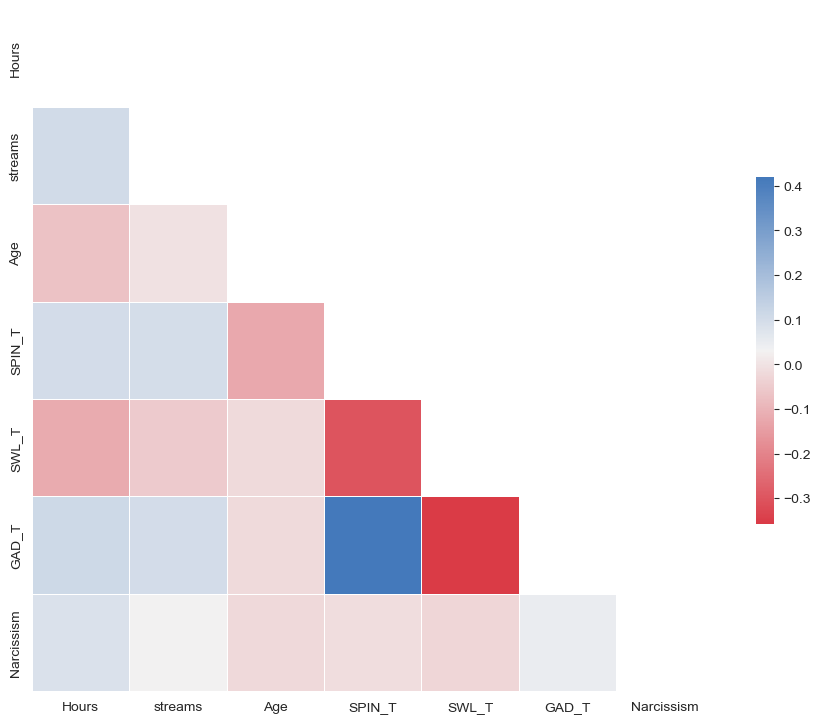

In [24]:
corr = gaming.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

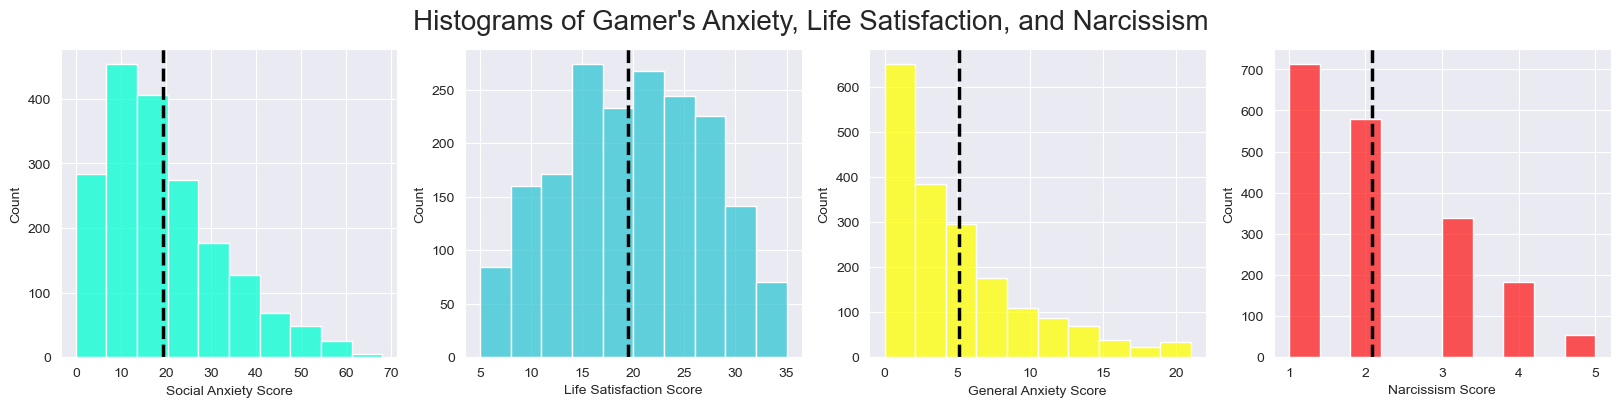

In [25]:
f = plt.figure(figsize= (20, 4))
gs = f.add_gridspec(1, 4)

sns.color_palette("icefire", as_cmap=True)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.histplot(gaming['SPIN_T'], bins = 10, color = '#00FFD1',)
    ax.set_xlabel("Social Anxiety Score")
    plt.axvline(x=gaming['SPIN_T'].mean(),
                color='black',
                ls='--',
                lw=2.5)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 1])
    sns.histplot(gaming['SWL_T'], bins = 10, color = '#31C6D4')
    ax.set_xlabel("Life Satisfaction Score")
    plt.axvline(x=gaming['SWL_T'].mean(),
                color='black',
                ls='--',
                lw=2.5)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 2])
    sns.histplot(gaming['GAD_T'], bins = 10, color = '#FFFF00')
    ax.set_xlabel("General Anxiety Score")
    plt.axvline(x=gaming['GAD_T'].mean(),
                color='black',
                ls='--',
                lw=2.5)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 3])
    sns.histplot(gaming['Narcissism'], bins = 10, color = '#FF1E1E')
    ax.set_xlabel("Narcissism Score")
    plt.axvline(x=gaming['Narcissism'].mean(),
                color='black',
                ls='--',
                lw=2.5)

f.suptitle("Histograms of Gamer's Anxiety, Life Satisfaction, and Narcissism", fontsize = 20)
plt.show()

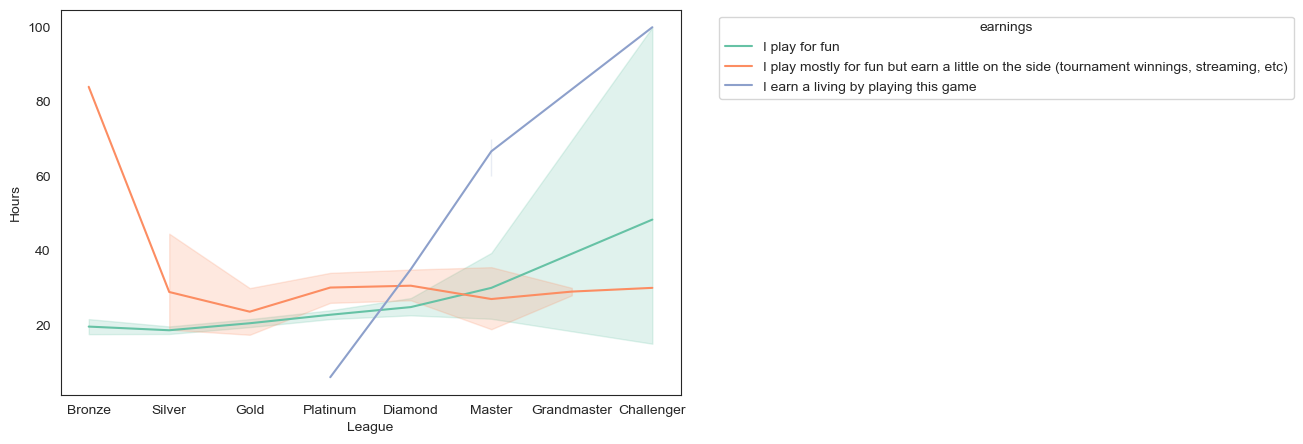

In [26]:
f = plt.figure(figsize= (8, 5))

ax = sns.lineplot(data = gaming, x = gaming['League'], y = gaming['Hours'], hue = gaming['earnings'], palette = sns.color_palette("Set2", 3))
sns.move_legend(ax, 'upper right', bbox_to_anchor = (2,1))


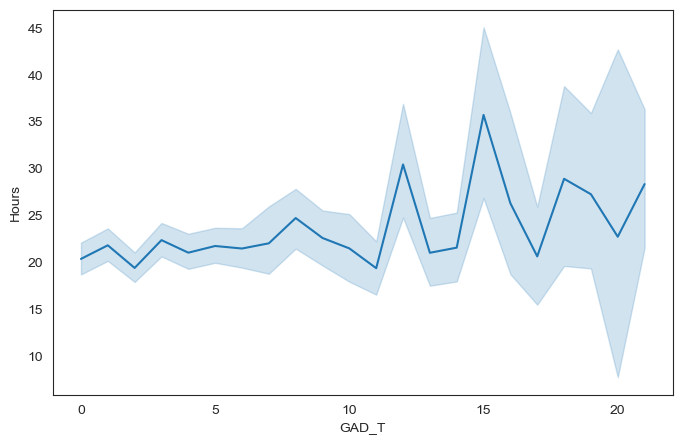

In [30]:
f = plt.figure(figsize= (8, 5))

ax = sns.lineplot(data = gaming, x = gaming['GAD_T'], y = gaming['Hours'])

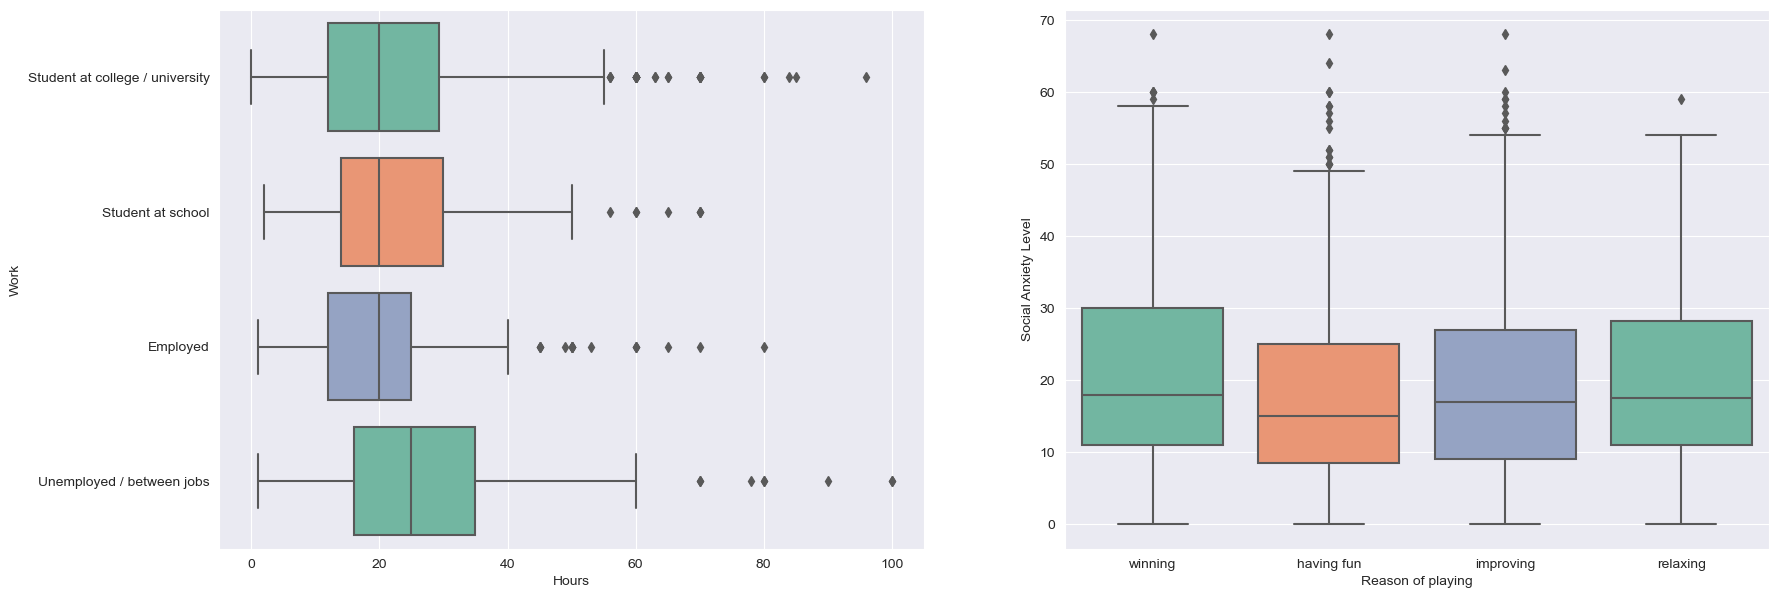

In [27]:
f = plt.figure(figsize= (20, 7))
gs = f.add_gridspec(1, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.boxplot(data = gaming, x = gaming['Hours'], y = gaming['Work'], palette = sns.color_palette("Set2", 3))

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 1])
    sns.boxplot(data = gaming, x = gaming['whyplay'], y = gaming['SPIN_T'], palette = sns.color_palette("Set2", 3))
    ax.set_xlabel("Reason of playing")
    ax.set_ylabel("Social Anxiety Level")



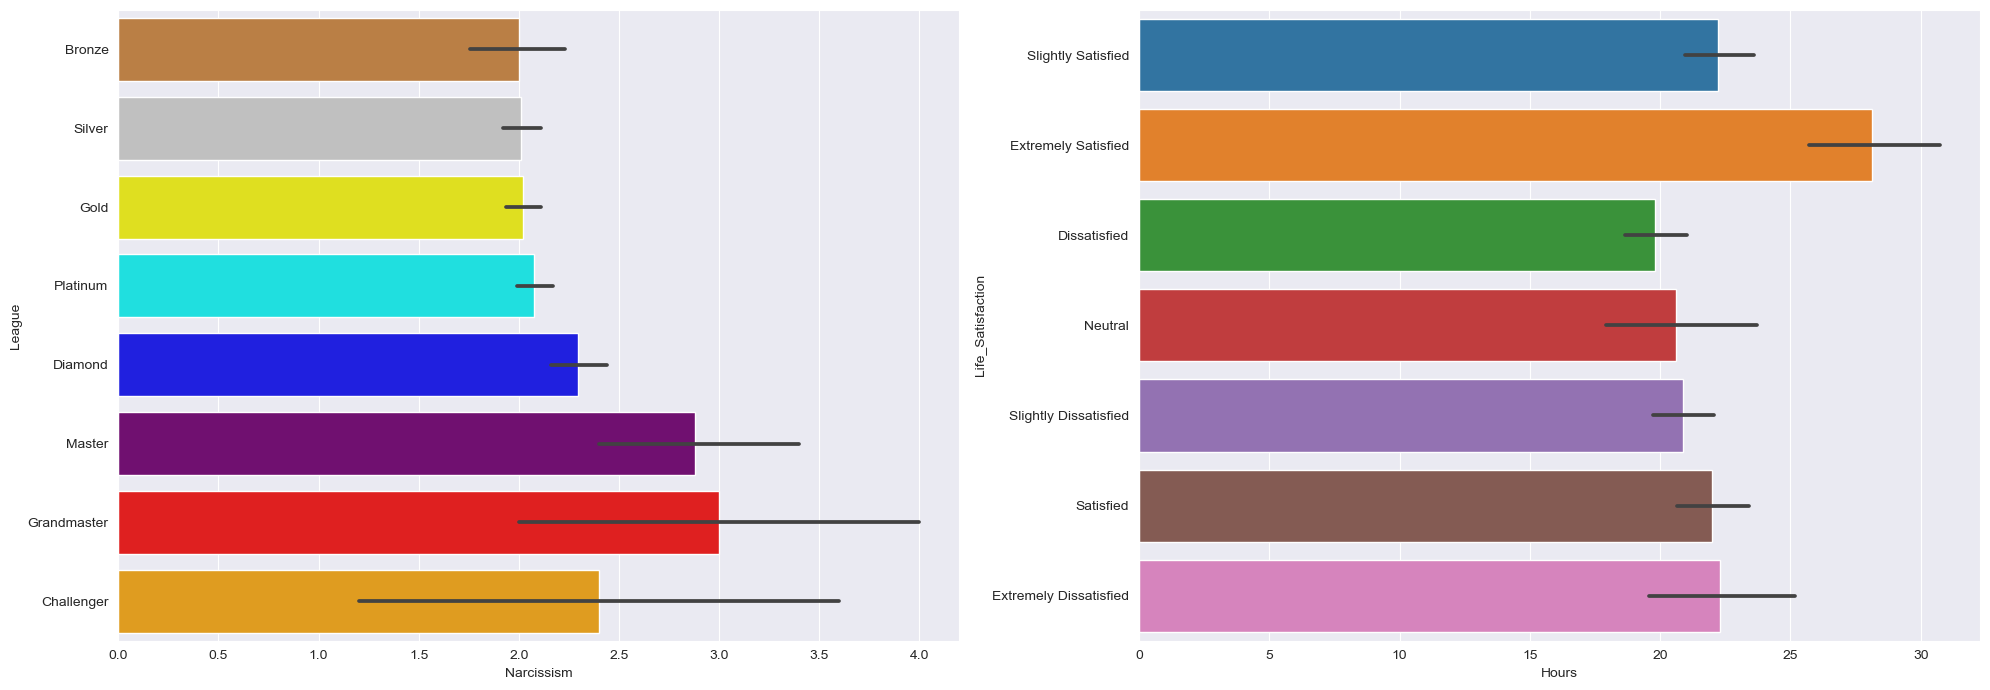

In [28]:
f = plt.figure(figsize= (20, 7))
gs = f.add_gridspec(1, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.barplot(y = gaming['League'], x = gaming['Narcissism'], palette = ['#CD7F32', '#C0C0C0', 'yellow' , 'cyan', 'blue', 'purple', 'red', 'orange'] )

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 1])
    sns.barplot(data = gaming, y=gaming['Life_Satisfaction'], x=gaming['Hours'])

plt.tight_layout()

In [45]:
gaming.head()

,Game,Platform,Hours,earnings,whyplay,League,streams,Age,Work,Degree,Playstyle,SPIN_T,SWL_T,GAD_T,Social_Anxiety,Life_Satisfaction,Anxiety_Level,Narcissism,Residence,Birthplace,Residence_ISO3,Birthplace_ISO3
95,Starcraft 2,PC,8.0,I play for fun,winning,Diamond,20.0,20,Student at college / university,Bachelor (or equivalent),Multiplayer - online - with strangers,16.0,18,5,None,Slightly Satisfied,Mild Anxiety,2.0,Germany,Germany,DEU,DEU
102,League of Legends,PC,12.0,I play for fun,winning,Gold,5.0,18,Student at college / university,High school diploma (or equivalent),Multiplayer - online - with strangers,50.0,8,13,Severe,Extremely Satisfied,Moderate Anxiety,2.0,UK,UK,GBR,GBR
118,League of Legends,PC,30.0,I play for fun,having fun,Gold,15.0,18,Student at school,High school diploma (or equivalent),Singleplayer,40.0,9,3,Moderate,Extremely Satisfied,Minimal Anxiety,1.0,Germany,Germany,DEU,DEU
129,League of Legends,PC,40.0,I play for fun,having fun,Diamond,15.0,18,Student at school,High school diploma (or equivalent),Multiplayer - online - with real life friends,7.0,27,11,None,Dissatisfied,Moderate Anxiety,2.0,Norway,Norway,NOR,NOR
165,League of Legends,PC,20.0,I play for fun,having fun,Gold,10.0,23,Student at college / university,Bachelor (or equivalent),Multiplayer - online - with real life friends,8.0,30,4,None,Dissatisfied,Minimal Anxiety,4.0,Germany,Italy,DEU,ITA


In [35]:
gaming.to_csv('gaming.csv')


,Game,Platform,Hours,earnings,whyplay,League,streams,Age,Work,Degree,Playstyle,SPIN_T,SWL_T,GAD_T,Social_Anxiety,Life_Satisfaction,Anxiety_Level,Narcissism,Residence,Birthplace,Residence_ISO3,Birthplace_ISO3
95,Starcraft 2,PC,8.0,I play for fun,winning,Diamond,20.0,20,Student at college / university,Bachelor (or equivalent),Multiplayer - online - with strangers,16.0,18,5,None,Slightly Satisfied,Mild Anxiety,2.0,Germany,Germany,DEU,DEU
102,League of Legends,PC,12.0,I play for fun,winning,Gold,5.0,18,Student at college / university,High school diploma (or equivalent),Multiplayer - online - with strangers,50.0,8,13,Severe,Extremely Satisfied,Moderate Anxiety,2.0,UK,UK,GBR,GBR
118,League of Legends,PC,30.0,I play for fun,having fun,Gold,15.0,18,Student at school,High school diploma (or equivalent),Singleplayer,40.0,9,3,Moderate,Extremely Satisfied,Minimal Anxiety,1.0,Germany,Germany,DEU,DEU
129,League of Legends,PC,40.0,I play for fun,having fun,Diamond,15.0,18,Student at school,High school diploma (or equivalent),Multiplayer - online - with real life friends,7.0,27,11,None,Dissatisfied,Moderate Anxiety,2.0,Norway,Norway,NOR,NOR
165,League of Legends,PC,20.0,I play for fun,having fun,Gold,10.0,23,Student at college / university,Bachelor (or equivalent),Multiplayer - online - with real life friends,8.0,30,4,None,Dissatisfied,Minimal Anxiety,4.0,Germany,Italy,DEU,ITA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13421,Other,PC,21.0,I play for fun,having fun,Bronze,1.0,18,Unemployed / between jobs,High school diploma (or equivalent),Multiplayer - online - with real life friends,29.0,30,0,Mild,Dissatisfied,Minimal Anxiety,3.0,Canada,Canada,CAN,CAN
13423,League of Legends,PC,25.0,I play for fun,having fun,Silver,50.0,24,Student at college / university,Master (or equivalent),Multiplayer - online - with strangers,41.0,12,0,Severe,Satisfied,Minimal Anxiety,1.0,France,France,FRA,FRA
13438,League of Legends,PC,20.0,I play for fun,relaxing,Diamond,25.0,27,Employed,Master (or equivalent),Multiplayer - online - with strangers,0.0,35,21,None,Extremely Dissatisfied,Severe Anxiety,5.0,Russia,USA,RUS,USA
13450,League of Legends,PC,15.0,I play for fun,having fun,Gold,0.0,21,Student at college / university,Bachelor (or equivalent),Multiplayer - online - with real life friends,3.0,28,3,None,Dissatisfied,Minimal Anxiety,2.0,Croatia,Croatia,HRV,HRV


# Time to do *machine learning*
woohoo.....
# Classification
Lets make important categorical features to ordinal values

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in gaming.columns:
    if gaming[i].dtype == 'object' or gaming[i].dtype == 'string' or gaming[i].dtype == 'category':
        gaming[i] = le.fit_transform(gaming[i])

In [71]:
gaming['League'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1869 entries, 95 to 13457
Series name: League
Non-Null Count  Dtype
--------------  -----
1869 non-null   int32
dtypes: int32(1)
memory usage: 86.4 KB


In [88]:
y = gaming['GAD_T']
X = gaming[['Hours', 'earnings', 'whyplay', 'League', 'streams', 'Age', 'Work', 'Playstyle', 'SPIN_T', 'SWL_T', 'Narcissism']]

In [73]:

from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
gaming_model = DecisionTreeRegressor()

# Fit model
gaming_model.fit(X, y)

DecisionTreeRegressor()

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score , mean_squared_error ,confusion_matrix,accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

lc = LogisticRegression(max_iter=3250 , n_jobs=-1 )
lc.fit(X_train,y_train)
lc_pred = lc.predict(X_test)
accuracy_score(lc_pred,y_test)

0.12477718360071301

In [95]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X, y)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))
clf.score(X_test, y_test)

Number of mislabeled points out of a total 561 points : 499


0.11051693404634581

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 561 points : 537


In [97]:
print("Making predictions for the following 5 gamers:")
print(X.head())
print("The predictions are")
print(gaming_model.predict(X.head()))


Making predictions for the following 5 gamers:
     Hours  earnings  whyplay  League  streams  Age  Work  Playstyle  SPIN_T  \
95     8.0         1        3       2     20.0   20     1          3    16.0   
102   12.0         1        3       3      5.0   18     1          3    50.0   
118   30.0         1        0       3     15.0   18     2          4    40.0   
129   40.0         1        0       2     15.0   18     2          2     7.0   
165   20.0         1        0       3     10.0   23     1          2     8.0   

     SWL_T  Narcissism  
95      18         2.0  
102      8         2.0  
118      9         1.0  
129     27         2.0  
165     30         4.0  
The predictions are


C:\Users\jpjon\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- Game

  warnings.warn(message, FutureWarning)


ValueError: X has 11 features, but DecisionTreeRegressor is expecting 12 features as input.

Make a base model first and then tune models by feature engineering.

In [98]:
gaming

,Game,Platform,Hours,earnings,whyplay,League,streams,Age,Work,Degree,Playstyle,SPIN_T,SWL_T,GAD_T,Social_Anxiety,Life_Satisfaction,Anxiety_Level,Narcissism,Residence,Birthplace,Residence_ISO3,Birthplace_ISO3
95,9,1,8.0,1,3,2,20.0,20,1,0,3,16.0,18,5,2,6,1,2.0,22,30,15,22
102,6,1,12.0,1,3,3,5.0,18,1,1,3,50.0,8,13,3,2,3,2.0,73,88,24,32
118,6,1,30.0,1,0,3,15.0,18,2,1,4,40.0,9,3,1,2,2,1.0,22,30,15,22
129,6,1,40.0,1,0,2,15.0,18,2,1,2,7.0,27,11,2,0,3,2.0,49,63,53,66
165,6,1,20.0,1,0,3,10.0,23,1,0,2,8.0,30,4,2,0,2,4.0,22,42,15,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13421,7,1,21.0,1,0,0,1.0,18,3,1,2,29.0,30,0,0,0,2,3.0,8,12,9,13
13423,6,1,25.0,1,0,7,50.0,24,1,2,3,41.0,12,0,3,4,2,1.0,20,28,22,30
13438,6,1,20.0,1,2,2,25.0,27,0,2,3,0.0,35,21,2,1,0,5.0,58,89,63,90
13450,6,1,15.0,1,0,3,0.0,21,1,0,2,3.0,28,3,2,0,2,2.0,12,17,32,38
